In [12]:
#imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

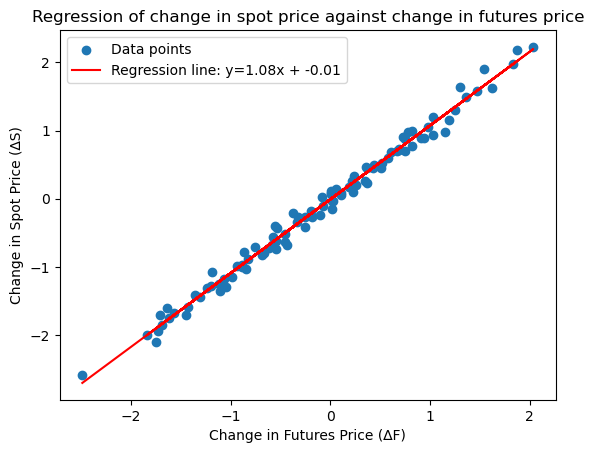

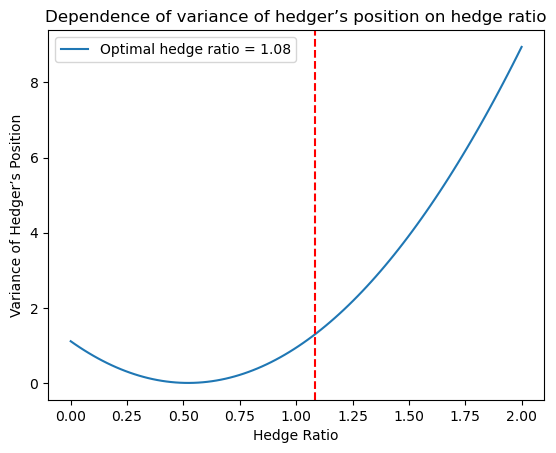

In [6]:
#Calculating the Minimum Variance Hedge Ratio

# 1. Génération de données (exemple)
np.random.seed(100)
delta_F = np.random.randn(100) 
delta_S = 1.2 * delta_F + 0.5 * np.random.randn(100) 

# 2. Régression linéaire
slope, intercept, r_value, _, _ = linregress(delta_F, delta_S)

# 3. Calcul du hedge ratio h*
sigma_S = np.std(delta_S)
sigma_F = np.std(delta_F)
h_star = r_value * sigma_S / sigma_F

# 4. Graphique de la régression
plt.scatter(delta_F, delta_S, label="Data points")
plt.plot(delta_F, slope*delta_F + intercept, color="red", label=f"Regression line: y={slope:.2f}x + {intercept:.2f}")
plt.xlabel('Change in Futures Price (∆F)')
plt.ylabel('Change in Spot Price (∆S)')
plt.legend()
plt.title('Regression of change in spot price against change in futures price')
plt.show()

# 5. Graphique de la dépendance de la variance
hedge_ratios = np.linspace(0, 2, 100)
variances = [(1-h_ratio)**2 * sigma_S**2 + h_ratio**2 * sigma_F**2 - 2*h_ratio*(1-h_ratio)*r_value*sigma_S*sigma_F for h_ratio in hedge_ratios]

plt.plot(hedge_ratios, variances, label=f"Optimal hedge ratio = {h_star:.2f}")
plt.xlabel('Hedge Ratio')
plt.ylabel('Variance of Hedger’s Position')
plt.title('Dependence of variance of hedger’s position on hedge ratio')
plt.axvline(x=h_star, color='r', linestyle='--')
plt.legend()
plt.show()

In [7]:
#Optimal Number of Contracts

def optimal_number_of_contracts(h_star, QA, QF):
    return h_star * QA / QF

# Exemple:
h_star = 0.8  # Supposons que c'est la valeur que nous avons obtenue précédemment.
QA = 1000     # Taille de la position à couvrir, par exemple 1000 unités.
QF = 50       # Taille d'un contrat à terme, par exemple 50 unités.

N_star = optimal_number_of_contracts(h_star, QA, QF)
print(f"Optimal number of futures contracts for hedging: {N_star}")

Optimal number of futures contracts for hedging: 16.0


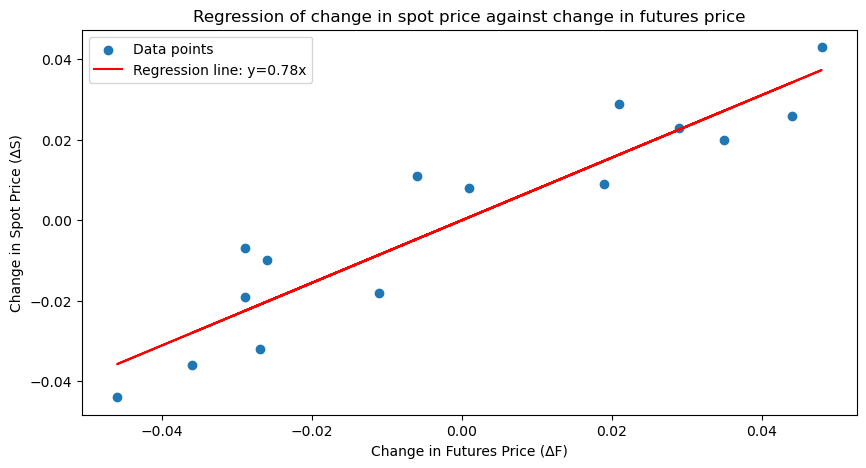

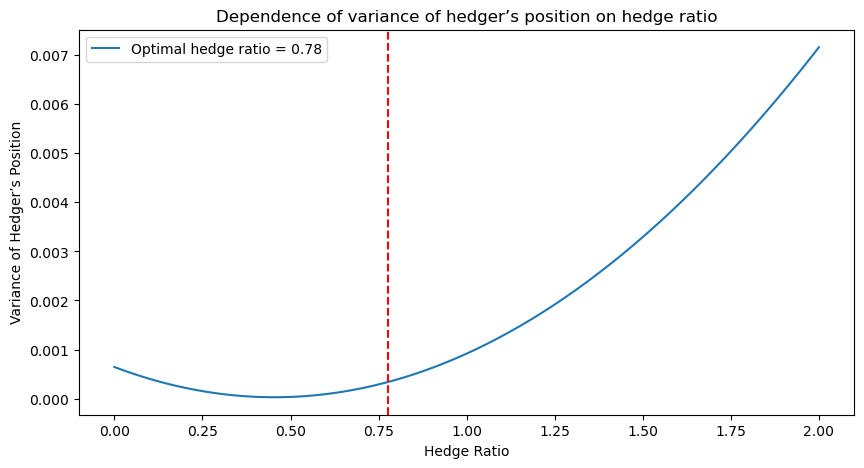

Optimal number of futures contracts for hedging: 15.55


In [8]:
#Airline example 


# Données fournies
months = np.arange(1, 16)
delta_F = np.array([0.021, 0.035, -0.046, 0.001, 0.044, -0.029, -0.026, -0.029, 0.048, -0.006, -0.036, -0.011, 0.019, -0.027, 0.029])
delta_S = np.array([0.029, 0.020, -0.044, 0.008, 0.026, -0.019, -0.010, -0.007, 0.043, 0.011, -0.036, -0.018, 0.009, -0.032, 0.023])

# 1. Régression linéaire
slope, _, r_value, _, _ = linregress(delta_F, delta_S)

# 2. Calcul du hedge ratio h*
sigma_S = np.std(delta_S)
sigma_F = np.std(delta_F)
h_star = r_value * sigma_S / sigma_F

# 3. Graphique de la régression
plt.figure(figsize=(10, 5))
plt.scatter(delta_F, delta_S, label="Data points")
plt.plot(delta_F, slope*delta_F, color="red", label=f"Regression line: y={slope:.2f}x")
plt.xlabel('Change in Futures Price (∆F)')
plt.ylabel('Change in Spot Price (∆S)')
plt.legend()
plt.title('Regression of change in spot price against change in futures price')
plt.show()

# 4. Graphique de la dépendance de la variance
hedge_ratios = np.linspace(0, 2, 100)
variances = [(1-h_ratio)**2 * sigma_S**2 + h_ratio**2 * sigma_F**2 - 2*h_ratio*(1-h_ratio)*r_value*sigma_S*sigma_F for h_ratio in hedge_ratios]

plt.figure(figsize=(10, 5))
plt.plot(hedge_ratios, variances, label=f"Optimal hedge ratio = {h_star:.2f}")
plt.xlabel('Hedge Ratio')
plt.ylabel('Variance of Hedger’s Position')
plt.title('Dependence of variance of hedger’s position on hedge ratio')
plt.axvline(x=h_star, color='r', linestyle='--')
plt.legend()
plt.show()

# 5. Calcul du nombre optimal de contrats
QA = 1000  # Supposons que la taille de la position à couvrir est de 1000 unités
QF = 50    # Supposons que la taille d'un contrat à terme est de 50 unités
N_star = h_star * QA / QF
print(f"Optimal number of futures contracts for hedging: {N_star:.2f}")


In [9]:
#Tailing the Hedge


def daily_hedge_ratio(rho_hat, sigma_S_hat, sigma_F_hat):
    return rho_hat * sigma_S_hat / sigma_F_hat

def daily_optimal_number_of_contracts(h_hat, S, QA, F, QF):
    VA = S * QA  # Valeur en dollars de la position à couvrir
    VF = F * QF  # Valeur en dollars d'un contrat à terme
    return h_hat * VA / VF

# Supposons les valeurs suivantes pour les paramètres (vous pouvez les ajuster selon vos besoins) :
rho_hat = 0.9
sigma_S_hat = 0.02  # 2% par exemple
sigma_F_hat = 0.015  # 1.5% par exemple
S = 100  # Prix spot actuel
QA = 1000  # Supposons que la taille de la position à couvrir est de 1000 unités
F = 105  # Prix à terme actuel
QF = 50  # Supposons que la taille d'un contrat à terme est de 50 unités

h_hat = daily_hedge_ratio(rho_hat, sigma_S_hat, sigma_F_hat)
N_star_daily = daily_optimal_number_of_contracts(h_hat, S, QA, F, QF)

print(f"Daily hedge ratio: {h_hat:.2f}")
print(f"Optimal number of futures contracts for daily hedging: {N_star_daily:.2f}")


Daily hedge ratio: 1.20
Optimal number of futures contracts for daily hedging: 22.86


Number of futures contracts to be shorted: 30
Gain on the futures position: $810,000.00
Expected return on the portfolio over 3 months: -16.62%
Expected value of the portfolio in 3 months: $4,210,437.50
Expected value of the hedger’s position in 3 months: $5,020,437.50


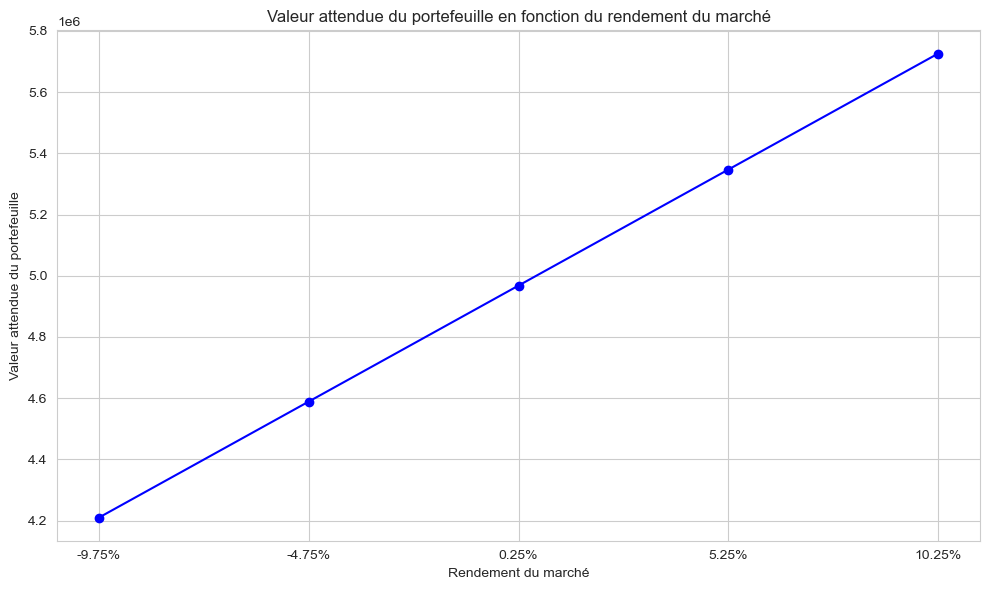

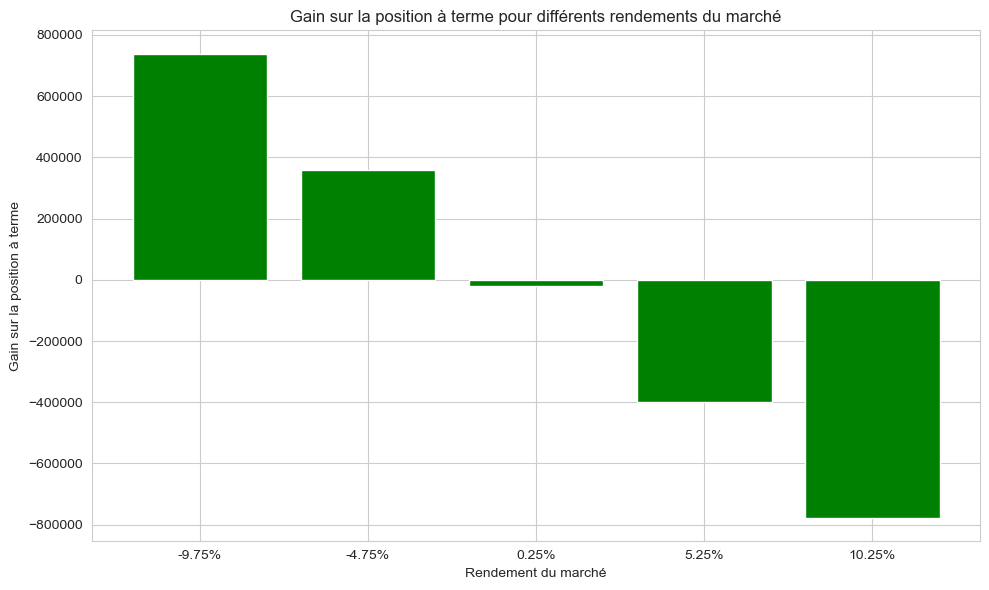

In [14]:
def calculate_number_of_contracts(VA, VF, beta=1.0):
    return beta * VA / VF

# Données de l'exemple
VA = 5050000
futures_price = 1010
contract_size = 250
VF = futures_price * contract_size
beta = 1.5

N_star = calculate_number_of_contracts(VA, VF, beta)
print(f"Number of futures contracts to be shorted: {int(N_star)}")

# Calcul du gain sur la position à terme
index_future_3_months = 902
gain_on_futures = N_star * (futures_price - index_future_3_months) * contract_size
print(f"Gain on the futures position: ${gain_on_futures:,.2f}")

# Rendement attendu sur le portefeuille
market_return = -9.75 / 100
rf = 4 / 100
expected_portfolio_return = rf + beta * (market_return - rf)
print(f"Expected return on the portfolio over 3 months: {expected_portfolio_return*100:.2f}%")

# Valeur attendue du portefeuille à la fin de 3 mois
expected_portfolio_value = VA * (1 + expected_portfolio_return)
print(f"Expected value of the portfolio in 3 months: ${expected_portfolio_value:,.2f}")

# Valeur attendue de la position du couvreur
expected_hedgers_position = expected_portfolio_value + gain_on_futures
print(f"Expected value of the hedger’s position in 3 months: ${expected_hedgers_position:,.2f}")


# Configuration des styles
sns.set_style("whitegrid")

# Visualisation de la valeur attendue du portefeuille en fonction de différents rendements du marché
market_returns = [-0.0975, -0.0475, 0.0025, 0.0525, 0.1025]
expected_portfolio_values = [VA * (1 + rf + beta * (mr - rf)) for mr in market_returns]

plt.figure(figsize=(10,6))
plt.plot(market_returns, expected_portfolio_values, marker='o', linestyle='-', color='blue')
plt.title("Valeur attendue du portefeuille en fonction du rendement du marché")
plt.xlabel("Rendement du marché")
plt.ylabel("Valeur attendue du portefeuille")
plt.xticks(market_returns, [f"{mr*100:.2f}%" for mr in market_returns])
plt.tight_layout()
plt.show()

# Histogramme des gains sur la position à terme
gains = [(futures_price - (futures_price + (mr * futures_price))) * contract_size * N_star for mr in market_returns]

plt.figure(figsize=(10,6))
plt.bar([f"{mr*100:.2f}%" for mr in market_returns], gains, color='green')
plt.title("Gain sur la position à terme pour différents rendements du marché")
plt.xlabel("Rendement du marché")
plt.ylabel("Gain sur la position à terme")
plt.tight_layout()
plt.show()


In [16]:
import math  # Importe la bibliothèque mathématique pour les fonctions mathématiques avancées.

def calculate_forward_price(S0, r, T):
    """
    Calcule le prix à terme pour un bon du Trésor à coupon zéro.
    
    Paramètres:
    - S0 : Le prix actuel du bon.
    - r  : Le taux d'intérêt sans risque (avec composition continue).
    - T  : La durée du contrat à terme en années.
    
    Retourne:
    - Le prix à terme du bon.
    """
    return S0 * math.exp(r * T)  # Utilise la formule pour le prix à terme.

# Données de l'exemple
S0 = 930  # Prix actuel du bon.
r = 0.06  # Taux d'intérêt sans risque.
T = 4/12  # Durée du contrat à terme en années (convertit 4 mois en fraction d'année).

# Calcul du prix à terme en utilisant la fonction définie ci-dessus.
F0 = calculate_forward_price(S0, r, T)

# Affiche le résultat.
print(f"Le prix d'exercice du contrat à terme est: ${F0:.2f}")


Le prix d'exercice du contrat à terme est: $948.79


In [17]:
import math

def calculate_forward_price_with_income(S0, I, r, T):
    """
    Calcule le prix à terme pour un actif d'investissement qui fournit un revenu connu.
    
    Paramètres:
    - S0 : Le prix actuel de l'actif.
    - I  : La valeur actuelle des revenus attendus pendant la durée du contrat.
    - r  : Le taux d'intérêt sans risque (avec composition continue).
    - T  : La durée du contrat à terme en années.
    
    Retourne:
    - Le prix à terme de l'actif.
    """
    return (S0 - I) * math.exp(r * T)

# Données de l'exemple
S0 = 900  # Prix actuel du bon
I = 40 * math.exp(-0.03 * (4/12))  # Valeur actuelle du coupon attendu
r = 0.04  # Taux d'intérêt sans risque pour la durée totale du contrat
T = 9/12  # Durée du contrat à terme en années (9 mois)

F0 = calculate_forward_price_with_income(S0, I, r, T)

print(f"Le prix d'exercice du contrat à terme est: ${F0:.2f}")


Le prix d'exercice du contrat à terme est: $886.60


In [18]:
import math

def calculate_index_futures_price(S0, r, q, T):
    """
    Calcule le prix à terme d'un indice boursier.
    
    Paramètres:
    - S0 : La valeur actuelle de l'indice.
    - r  : Le taux d'intérêt sans risque (avec composition continue).
    - q  : Le rendement du dividende de l'indice.
    - T  : La durée du contrat à terme en années.
    
    Retourne:
    - Le prix à terme de l'indice.
    """
    return S0 * math.exp((r - q) * T)

# Données de l'exemple
S0 = 1300  # Valeur actuelle de l'indice
r = 0.05  # Taux d'intérêt sans risque (avec composition continue)
q = 0.01  # Rendement du dividende de l'indice
T = 3/12  # Durée du contrat à terme en années (3 mois)

F0 = calculate_index_futures_price(S0, r, q, T)

print(f"Le prix à terme de l'indice est: ${F0:.2f}")


Le prix à terme de l'indice est: $1313.07


In [19]:
import math

def index_arbitrage_opportunity(S0, F0, r, q, T):
    """Déterminer s'il y a une opportunité d'arbitrage sur indices.

    Arguments:
    - S0 : Prix au comptant de l'indice
    - F0 : Prix à terme actuel
    - r  : Taux d'intérêt sans risque (annuel)
    - q  : Rendement du dividende (annuel)
    - T  : Maturité du contrat à terme (en années)

    Retour:
    - 'Buy Index & Short Future' si F0 > S0e^(r-q)T
    - 'Short Index & Buy Future' si F0 < S0e^(r-q)T
    - 'No Arbitrage Opportunity' sinon
    """

    expected_future_price = S0 * math.exp((r - q) * T)
    
    if F0 > expected_future_price:
        return 'Buy Index & Short Future'
    elif F0 < expected_future_price:
        return 'Short Index & Buy Future'
    else:
        return 'No Arbitrage Opportunity'

# Exemple d'utilisation
S0 = 1300  # Prix au comptant de l'indice
F0 = 1313.07  # Prix à terme actuel
r = 0.05  # Taux d'intérêt sans risque (5% annuel)
q = 0.01  # Rendement du dividende (1% annuel)
T = 0.25  # Maturité du contrat à terme (3 mois)

print(index_arbitrage_opportunity(S0, F0, r, q, T))


Buy Index & Short Future


In [20]:
def capm_return(R_f, beta_i, R_m):
    """
    Calcule le rendement attendu d'un actif en utilisant le CAPM.

    Paramètres:
    - R_f (float): Taux de rendement sans risque.
    - beta_i (float): Bêta de l'investissement.
    - R_m (float): Rendement attendu du marché.

    Retourne:
    - R_i (float): Rendement attendu de l'actif.
    """
    
    R_i = R_f + beta_i * (R_m - R_f)
    return R_i

# Exemple d'utilisation :
R_f = 0.03  # Supposons un rendement sans risque de 3%.
beta_i = 1.2  # Supposons un bêta pour notre investissement de 1.2.
R_m = 0.08  # Supposons un rendement du marché de 8%.

expected_return = capm_return(R_f, beta_i, R_m)
print(f"Le rendement attendu de l'actif est de {expected_return:.2%}.")


Le rendement attendu de l'actif est de 9.00%.


In [25]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Fonction pour calculer le rendement attendu d'un actif en utilisant le CAPM
def capm_return(R_f, beta_i, R_m):
    """
    Calcule le rendement attendu d'un actif en utilisant le CAPM.
    
    La formule CAPM est:
    R_i = R_f + beta_i * (R_m - R_f)
    
    où :
    - R_i est le rendement attendu de l'actif.
    - R_f est le rendement sans risque.
    - beta_i est la sensibilité de l'actif par rapport aux mouvements du marché.
    - R_m est le rendement attendu du marché.
    
    Paramètres:
    - R_f (float): Taux de rendement sans risque.
    - beta_i (float): Bêta de l'investissement.
    - R_m (float): Rendement attendu du marché.

    Retourne:
    - R_i (float): Rendement attendu de l'actif.
    """
    
    R_i = R_f + beta_i * (R_m - R_f)
    return R_i

def interactive_capm(R_f, beta_i, R_m):
    # Calcul du rendement attendu en utilisant la formule CAPM
    expected_return = capm_return(R_f, beta_i, R_m)
    
    # Création d'un graphique pour visualiser les rendements
    plt.figure(figsize=(10, 6))
    plt.bar(["R_f", "R_m", "Expected Return (CAPM)"], [R_f, R_m, expected_return], color=["blue", "green", "red"])
    
    # Fixer la limite supérieure du graphique pour une meilleure visualisation
    plt.ylim(0, max(0.2, expected_return + 0.05))
    plt.ylabel("Return")
    plt.title(f"Bêta = {beta_i:.2f}")
    plt.show()

    print(f"Le rendement attendu de l'actif est de {expected_return:.2%}.")

# Création de widgets interactifs pour ajuster les paramètres du CAPM
widgets.interactive(interactive_capm,
                    R_f=widgets.FloatSlider(min=0, max=0.1, step=0.01, value=0.03, description="R_f:"),
                    beta_i=widgets.FloatSlider(min=0.5, max=2.0, step=0.1, value=1.2, description="Beta:"),
                    R_m=widgets.FloatSlider(min=0, max=0.2, step=0.01, value=0.08, description="R_m:")
)


interactive(children=(FloatSlider(value=0.03, description='R_f:', max=0.1, step=0.01), FloatSlider(value=1.2, …

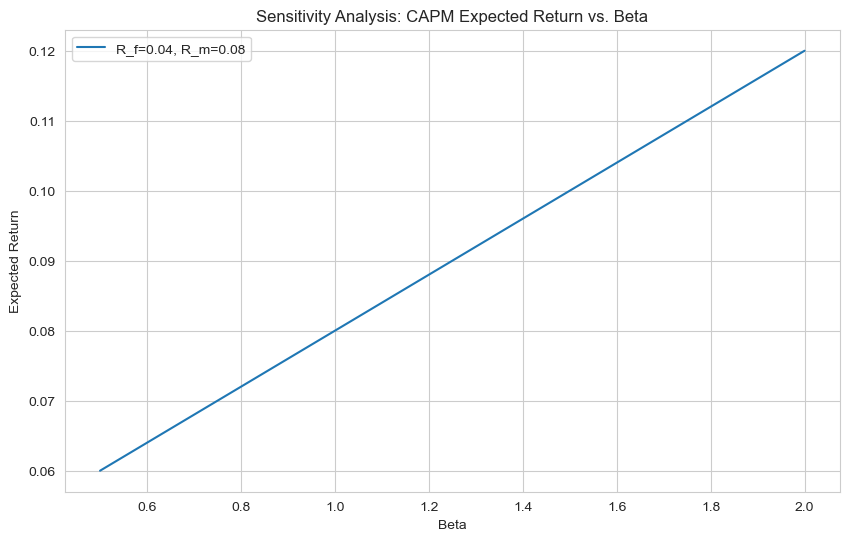

In [27]:
import numpy as np

# Paramètres constants
R_f_const = 0.04
R_m_const = 0.08

# Plage de valeurs pour beta_i
betas = np.linspace(0.5, 2.0, 100)
returns = [capm_return(R_f_const, beta, R_m_const) for beta in betas]

plt.figure(figsize=(10, 6))
plt.plot(betas, returns, label=f'R_f={R_f_const}, R_m={R_m_const}')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.title('Sensitivity Analysis: CAPM Expected Return vs. Beta')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Fonction pour afficher le graphique 3D
def plot_3d_capm(R_f, beta_min, beta_max, Rm_min, Rm_max, elev, azim):
    # Créer une grille de valeurs pour beta_i et R_m
    betas = np.linspace(beta_min, beta_max, 100)
    R_m_values = np.linspace(Rm_min, Rm_max, 100)
    
    B, Rm = np.meshgrid(betas, R_m_values)
    Ri = np.array([capm_return(R_f, b, rm) for b, rm in zip(np.ravel(B), np.ravel(Rm))])
    Ri = Ri.reshape(B.shape)
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(B, Rm, Ri, cmap='viridis')
    
    ax.set_xlabel('Beta')
    ax.set_ylabel('Expected Market Return (R_m)')
    ax.set_zlabel('Expected Asset Return (R_i)')
    ax.set_title('Sensitivity Analysis: CAPM Expected Return')
    ax.view_init(elev=elev, azim=azim)  # Contrôle de l'angle de vue
    
    plt.show()

# Barres interactives
widgets.interactive(plot_3d_capm,
                    R_f=widgets.FloatSlider(min=0, max=0.1, step=0.01, value=0.03, description="R_f:"),
                    beta_min=widgets.FloatSlider(min=0, max=2.5, step=0.1, value=0.5, description="Beta Min:"),
                    beta_max=widgets.FloatSlider(min=0.5, max=2.5, step=0.1, value=2.0, description="Beta Max:"),
                    Rm_min=widgets.FloatSlider(min=0, max=0.2, step=0.01, value=0.05, description="R_m Min:"),
                    Rm_max=widgets.FloatSlider(min=0, max=0.2, step=0.01, value=0.15, description="R_m Max:"),
                    elev=widgets.IntSlider(min=0, max=90, step=1, value=20, description="Elevation:"),
                    azim=widgets.IntSlider(min=0, max=360, step=1, value=45, description="Azimuth:")
)


interactive(children=(FloatSlider(value=0.03, description='R_f:', max=0.1, step=0.01), FloatSlider(value=0.5, …

In [37]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def calculate_beta(asset_symbol, market_symbol, start_date, end_date):
    # Télécharger les données de prix
    asset_data = yf.download(asset_symbol, start=start_date, end=end_date)[['Adj Close']].pct_change().dropna()
    market_data = yf.download(market_symbol, start=start_date, end=end_date)[['Adj Close']].pct_change().dropna()

    # S'assurer que les dates correspondent entre les deux séries
    joint_data = asset_data.join(market_data, lsuffix='_asset', rsuffix='_market').dropna()
    
    beta = joint_data.cov().iloc[0, 1] / joint_data['Adj Close_market'].var()
    return beta


# Estimation de bêta pour un actif spécifique
# Par exemple, pour Apple (AAPL) par rapport au S&P 500 (SPY) de 2020 à 2022:
beta_estimated = calculate_beta("AAPL", "^GSPC", "2020-01-01", "2022-01-01")
print(f"Estimated Beta for AAPL: {beta_estimated}")


def capm_return(R_f, beta_i, R_m):
    return R_f + beta_i * (R_m - R_f)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Estimated Beta for AAPL: 1.1464688714199727


In [40]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Fonction pour calculer le bêta
def calculate_beta(asset_symbol, market_symbol, start_date, end_date):
    # Télécharger les données de prix
    asset_data = yf.download(asset_symbol, start=start_date, end=end_date)[['Adj Close']].pct_change().dropna()
    market_data = yf.download(market_symbol, start=start_date, end=end_date)[['Adj Close']].pct_change().dropna()

    # S'assurer que les dates correspondent entre les deux séries
    joint_data = asset_data.join(market_data, lsuffix='_asset', rsuffix='_market').dropna()
    beta = joint_data.cov().iloc[0, 1] / joint_data['Adj Close_market'].var()
    return beta

# Fonction pour le rendement attendu selon le CAPM
def capm_return(R_f, beta_i, R_m):
    return R_f + beta_i * (R_m - R_f)

# Fonction pour afficher le graphique 3D
def plot_3d_capm(R_f, beta_min, beta_max, Rm_min, Rm_max, elev, azim):
    betas = np.linspace(beta_min, beta_max, 100)
    R_m_values = np.linspace(Rm_min, Rm_max, 100)
    B, Rm = np.meshgrid(betas, R_m_values)
    Ri = np.array([capm_return(R_f, b, rm) for b, rm in zip(np.ravel(B), np.ravel(Rm))])
    Ri = Ri.reshape(B.shape)
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(B, Rm, Ri, cmap='viridis')
    ax.set_xlabel('Beta')
    ax.set_ylabel('Expected Market Return (R_m)')
    ax.set_zlabel('Expected Asset Return (R_i)')
    ax.set_title('Sensitivity Analysis: CAPM Expected Return')
    ax.view_init(elev=elev, azim=azim)
    plt.show()

# Estimation de bêta pour un actif spécifique
beta_estimated = calculate_beta("AMZN", "^GSPC", "2020-01-01", "2022-01-01")
print(f"Estimated Beta for AAPL: {beta_estimated}")

# Création du widget interactif
widgets.interactive(plot_3d_capm,
                    R_f=widgets.FloatSlider(min=0, max=0.1, step=0.01, value=0.03, description="R_f:"),
                    beta_min=widgets.FloatSlider(min=0, max=2.5, step=0.1, value=beta_estimated-0.5, description="Beta Min:"),
                    beta_max=widgets.FloatSlider(min=0.5, max=2.5, step=0.1, value=beta_estimated+0.5, description="Beta Max:"),
                    Rm_min=widgets.FloatSlider(min=0, max=0.2, step=0.01, value=0.05, description="R_m Min:"),
                    Rm_max=widgets.FloatSlider(min=0, max=0.2, step=0.01, value=0.15, description="R_m Max:"),
                    elev=widgets.IntSlider(min=0, max=90, step=1, value=20, description="Elevation:"),
                    azim=widgets.IntSlider(min=0, max=360, step=1, value=45, description="Azimuth:")
)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Estimated Beta for AAPL: 1.1464682795418937
Estimated Beta for AMZN: 0.7265056306902924
Estimated Beta for MSFT: 1.1239359936094195
Estimated Beta for GOOGL: 0.9959434522988865


interactive(children=(FloatSlider(value=0.03, description='R_f:', max=0.1, step=0.01), FloatSlider(value=0.226…

In [45]:

import yfinance as yf
import pandas as pd

nasdaq100_symbols = [
    "ABNB", "ADBE", "ADI", "ADP", "ADSK", "AEP", "ALGN", "AMAT", "AMD", "AMGN", "ANSS", "ASML",
    "AVGO", "AZN", "BIIB", "BKNG", "BKR", "CDNS", "CEG", "CHTR", "CMCSA", "COST", "CPRT", "CRWD", 
    "CSCO", "CSGP", "CSX", "CTAS", "CTSH", "DDOG", "DLTR", "DXCM", "EA", "EBAY", "ENPH", "EXC", 
    "FANG", "FAST", "FTNT", "GEHC", "GFS", "GILD", "GOOG", "GOOGL", "HON", "IDXX", "ILMN", "INTC", 
    "INTU", "ISRG", "JD", "KDP", "KHC", "KLAC", "LCID", "LRCX", "LULU", "MAR", "MCHP", "MDLZ", "MELI", 
    "META", "MNST", "MRNA", "MRVL", "MSFT", "MU", "NXPI", "ODFL", "ON", "ORLY", "PANW", "PAYX", "PCAR", 
    "PDD", "PEP", "PYPL", "QCOM", "REGN", "ROST", "SBUX", "SGEN", "SIRI", "SNPS", "TEAM"
]

def calculate_beta(symbol, market_symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    market_data = yf.download(market_symbol, start=start_date, end=end_date)
    
    stock_returns = stock_data['Adj Close'].pct_change().dropna()
    market_returns = market_data['Adj Close'].pct_change().dropna()
    
    covariance = stock_returns.cov(market_returns)
    variance = market_returns.var()
    beta = covariance / variance
    
    return beta

def calculate_betas_for_nasdaq100(market_symbol, start_date, end_date):
    betas = {}
    for symbol in nasdaq100_symbols:
        try:
            beta = calculate_beta(symbol, market_symbol, start_date, end_date)
            betas[symbol] = beta
        except Exception as e:
            print(f"Error calculating beta for {symbol}: {e}")
            betas[symbol] = None
    return betas

# Calculate betas for NASDAQ 100 components against S&P 500 from 2020 to 2022
nasdaq100_betas = calculate_betas_for_nasdaq100("^IXIC", "2020-01-01", "2022-01-01")

for symbol, beta in nasdaq100_betas.items():
    print(f"{symbol}: {beta}")

    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


1 Failed download:
['CEG']: Exception("%ticker%: Data doesn't exist for startDate = 1577854800, endDate = 1641013200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['GEHC']: Exception("%ticker%: Data doesn't exist for startDate = 1577854800, endDate = 1641013200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [50]:
import yfinance as yf
import pandas as pd

# Liste des symboles du NASDAQ 100
nasdaq100_symbols = [
    "ABNB", "ADBE", "ADI", "ADP", "ADSK", "AEP", "ALGN", "AMAT", "AMD", "AMGN", "ANSS", "ASML",
    "AVGO", "AZN", "BIIB", "BKNG", "BKR", "CDNS", "CEG", "CHTR", "CMCSA", "COST", "CPRT", "CRWD", 
    "CSCO", "CSGP", "CSX", "CTAS", "CTSH", "DDOG", "DLTR", "DXCM", "EA", "EBAY", "ENPH", "EXC", 
    "FANG", "FAST", "FTNT", "GEHC", "GFS", "GILD", "GOOG", "GOOGL", "HON", "IDXX", "ILMN", "INTC", 
    "INTU", "ISRG", "JD", "KDP", "KHC", "KLAC", "LCID", "LRCX", "LULU", "MAR", "MCHP", "MDLZ", "MELI", 
    "META", "MNST", "MRNA", "MRVL", "MSFT", "MU", "NXPI", "ODFL", "ON", "ORLY", "PANW", "PAYX", "PCAR", 
    "PDD", "PEP", "PYPL", "QCOM", "REGN", "ROST", "SBUX", "SGEN", "SIRI", "SNPS", "TEAM"
]

# Calcul du bêta pour une action par rapport à un indice de marché
def calculate_beta(symbol, market_symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    market_data = yf.download(market_symbol, start=start_date, end=end_date)
    
    stock_returns = stock_data['Adj Close'].pct_change().dropna()
    market_returns = market_data['Adj Close'].pct_change().dropna()
    
    covariance = stock_returns.cov(market_returns)
    variance = market_returns.var()
    
    return covariance / variance

# Calcul des bêtas pour toutes les actions du NASDAQ 100 par rapport à un indice de marché
def calculate_betas_for_nasdaq100(market_symbol, start_date, end_date):
    betas = {}
    for symbol in nasdaq100_symbols:
        try:
            beta = calculate_beta(symbol, market_symbol, start_date, end_date)
            betas[symbol] = beta
        except Exception as e:
            print(f"Erreur lors du calcul du beta pour {symbol}: {e}")
            betas[symbol] = None
    return betas

# Récupération du taux sans risque
def fetch_risk_free_rate():
    tnx_data = yf.download('^TNX', period='1d')  # Récupérer les données pour aujourd'hui
    latest_tnx_close = tnx_data['Close'].iloc[-1]  # Prendre la dernière valeur de fermeture
    return latest_tnx_close / 100  # Convertir le rendement en pourcentage

# Rendement attendu selon le CAPM
def calculate_capm_expected_return(beta, rf, rm):
    return rf + beta * (rm - rf)

# Récupération du taux sans risque
rf = fetch_risk_free_rate()
print(f"Taux sans risque (rf): {rf:.2%}")

# Rendement attendu du marché (valeur fictive pour l'exemple)
rm = 0.17 # rendement attendu du marché de 8%

# Calcul des bêtas pour les composants du NASDAQ 100 par rapport à l'indice NASDAQ composite
nasdaq100_betas = calculate_betas_for_nasdaq100("^IXIC", "2020-01-01", "2022-01-01")
print("\nBetas pour les composants du NASDAQ 100:")
for symbol, beta in nasdaq100_betas.items():
    print(f"{symbol}: {beta}")

# Calcul des rendements attendus selon le CAPM pour chaque action
nasdaq100_expected_returns = {}
for symbol, beta in nasdaq100_betas.items():
    if beta is not None:  # pour s'assurer que le beta existe
        expected_return = calculate_capm_expected_return(beta, rf, rm)
        nasdaq100_expected_returns[symbol] = expected_return
    else:
        nasdaq100_expected_returns[symbol] = None

print("\nRendements attendus selon le CAPM:")
for symbol, expected_return in nasdaq100_expected_returns.items():
    if expected_return is not None:
        print(f"{symbol}: {expected_return:.2%}")
    else:
        print(f"{symbol}: Erreur lors du calcul")



[*********************100%%**********************]  1 of 1 completed
Taux sans risque (rf): 4.32%
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[****


1 Failed download:
['CEG']: Exception("%ticker%: Data doesn't exist for startDate = 1577854800, endDate = 1641013200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['GEHC']: Exception("%ticker%: Data doesn't exist for startDate = 1577854800, endDate = 1641013200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

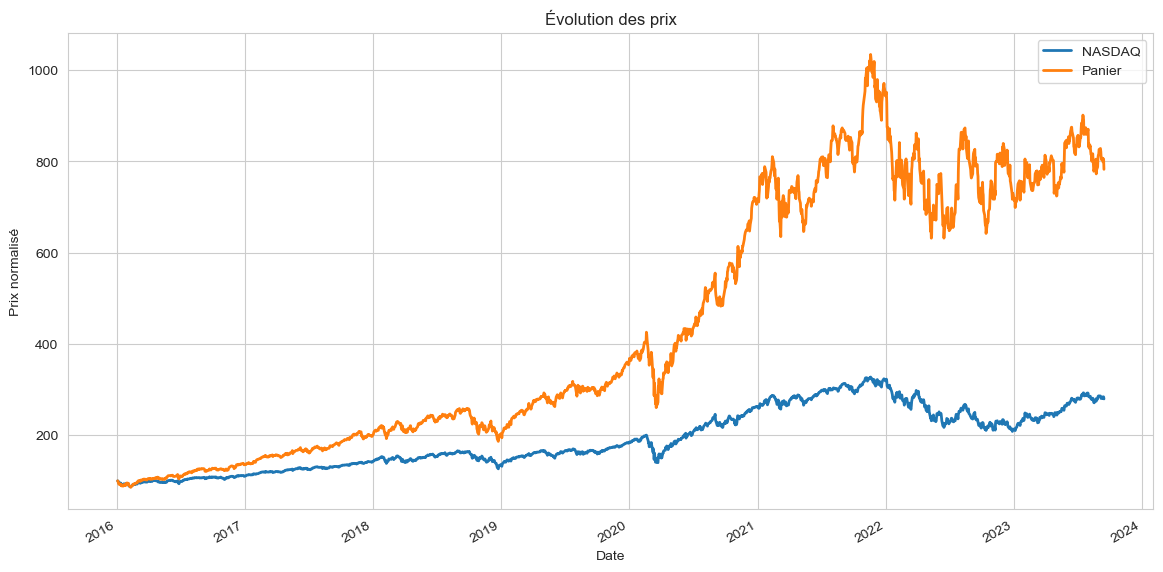

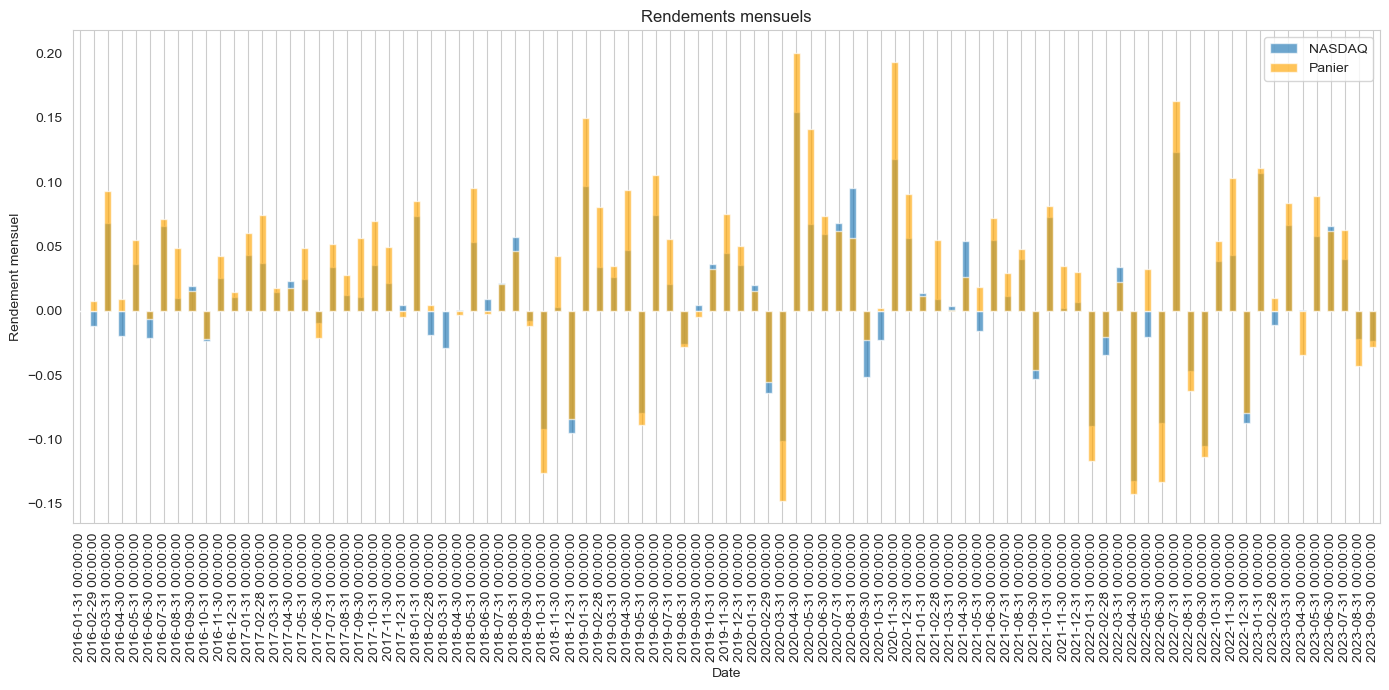

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [59]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fonction pour récupérer les données des symboles donnés
def fetch_data(symbols, start_date, end_date):
    data = {}
    for symbol in symbols:
        df = yf.download(symbol, start=start_date, end=end_date)['Adj Close']
        data[symbol] = df
    return pd.DataFrame(data)

# Définition de la période de temps
start_date_comparison = "2016-01-01"
end_date_comparison = "2023-09-17"

# Liste des actions sélectionnées (vous devez calculer cette liste à partir de votre analyse CAPM)
selected_stocks = {k: v for k, v in nasdaq100_expected_returns.items() if v and v > rm}
symbols = list(selected_stocks.keys()) + ["^IXIC"]

# Récupération des données des symboles sélectionnés
data = fetch_data(symbols, start_date_comparison, end_date_comparison)

# Calcul des rendements mensuels
monthly_returns = data.resample('M').ffill().pct_change()

# Normalisation des données pour commencer à 100
data_normalized = data / data.iloc[0] * 100  

# Affichage du graphique des prix normalisés
plt.figure(figsize=(14, 7))
data_normalized['^IXIC'].plot(label='NASDAQ', lw=2)
data_normalized[list(selected_stocks.keys())].mean(axis=1).plot(label='Panier', lw=2)
plt.title('Évolution des prix')
plt.xlabel('Date')
plt.ylabel('Prix normalisé')
plt.legend()
plt.grid(True)
plt.show()

# Affichage du graphique en bâtonnets des rendements mensuels
plt.figure(figsize=(14, 7))
monthly_returns['^IXIC'].plot(kind='bar', label='NASDAQ', alpha=0.65)
monthly_returns[list(selected_stocks.keys())].mean(axis=1).plot(kind='bar', color='orange', label='Panier', alpha=0.65)
plt.title('Rendements mensuels')
plt.xlabel('Date')
plt.ylabel('Rendement mensuel')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Calcul du rendement cumulatif du panier d'actions sélectionnées
def calculate_cumulative_return(symbols, start_date, end_date):
    if not symbols:
        return 0

    total_returns = 0
    for symbol in symbols:
        data = yf.download(symbol, start=start_date, end=end_date)
        total_returns += (data['Adj Close'].iloc[-1] / data['Adj Close'].iloc[0] - 1)

    # Calcul du rendement moyen pour le panier d'actions
    return total_returns / len(symbols)

# Calcul du rendement cumulatif du panier d'actions sélectionnées
basket_return = calculate_cumulative_return(selected_stocks.keys(), start_date_comparison, end_date_comparison)

# Calcul du rendement cumulatif du NASDAQ
nasdaq_return = calculate_cumulative_return(["^IXIC"], start_date_comparison, end_date_comparison)

print(f"\nRendement du panier d'actions sélectionnées entre {start_date_comparison} et {end_date_comparison}: {basket_return:.2%}")
print(f"Rendement du NASDAQ entre {start_date_comparison} et {end_date_comparison}: {nasdaq_return:.2%}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

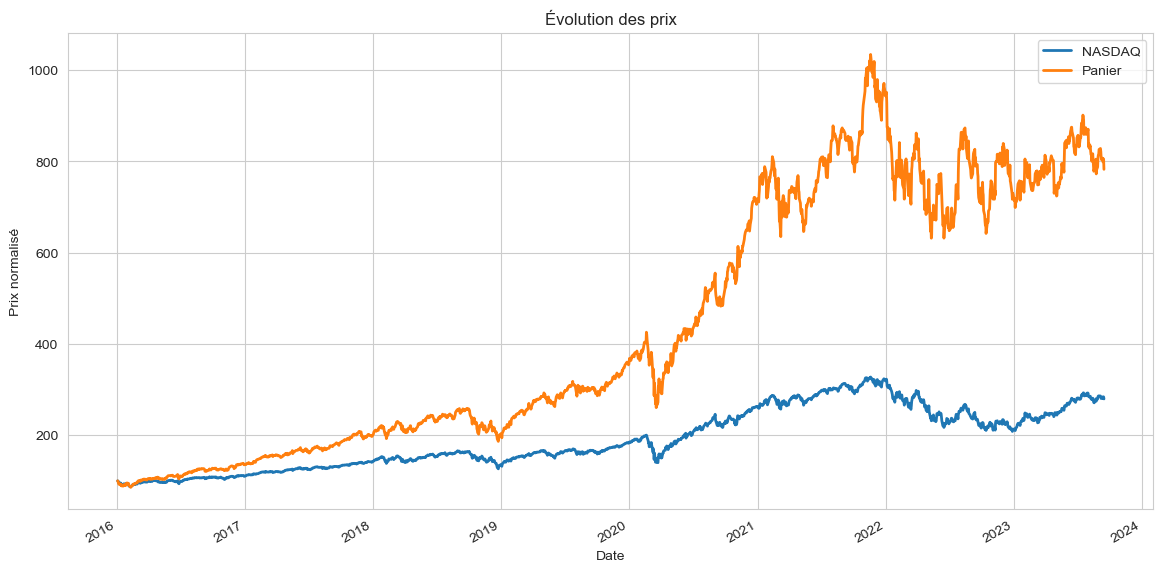

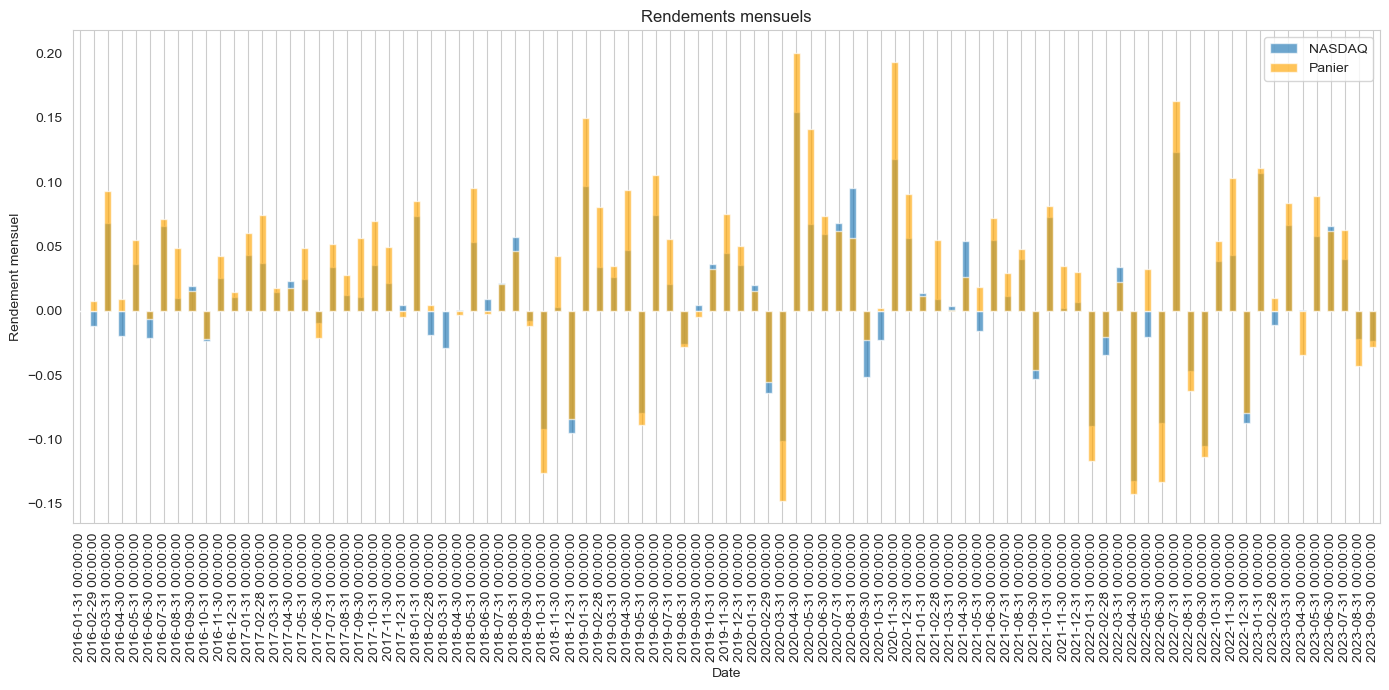

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [60]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fonction pour récupérer les données des symboles donnés
def fetch_data(symbols, start_date, end_date):
    data = {}
    for symbol in symbols:
        df = yf.download(symbol, start=start_date, end=end_date)['Adj Close']
        data[symbol] = df
    return pd.DataFrame(data)

# Définition de la période de temps
start_date_comparison = "2016-01-01"
end_date_comparison = "2023-09-17"

# Liste des actions sélectionnées (vous devez calculer cette liste à partir de votre analyse CAPM)
selected_stocks = {k: v for k, v in nasdaq100_expected_returns.items() if v and v > rm}
symbols = list(selected_stocks.keys()) + ["^IXIC"]

# Récupération des données des symboles sélectionnés
data = fetch_data(symbols, start_date_comparison, end_date_comparison)

# Calcul des rendements mensuels
monthly_returns = data.resample('M').ffill().pct_change()

# Normalisation des données pour commencer à 100
data_normalized = data / data.iloc[0] * 100  

# Affichage du graphique des prix normalisés
plt.figure(figsize=(14, 7))
data_normalized['^IXIC'].plot(label='NASDAQ', lw=2)
data_normalized[list(selected_stocks.keys())].mean(axis=1).plot(label='Panier', lw=2)
plt.title('Évolution des prix')
plt.xlabel('Date')
plt.ylabel('Prix normalisé')
plt.legend()
plt.grid(True)
plt.show()

# Affichage du graphique en bâtonnets des rendements mensuels
plt.figure(figsize=(14, 7))
monthly_returns['^IXIC'].plot(kind='bar', label='NASDAQ', alpha=0.65)
monthly_returns[list(selected_stocks.keys())].mean(axis=1).plot(kind='bar', color='orange', label='Panier', alpha=0.65)
plt.title('Rendements mensuels')
plt.xlabel('Date')
plt.ylabel('Rendement mensuel')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Calcul du rendement cumulatif du panier d'actions sélectionnées
def calculate_cumulative_return(symbols, start_date, end_date):
    if not symbols:
        return 0

    total_returns = 0
    for symbol in symbols:
        data = yf.download(symbol, start=start_date, end=end_date)
        total_returns += (data['Adj Close'].iloc[-1] / data['Adj Close'].iloc[0] - 1)

    # Calcul du rendement moyen pour le panier d'actions
    return total_returns / len(symbols)

# Calcul du rendement cumulatif du panier d'actions sélectionnées
basket_return = calculate_cumulative_return(selected_stocks.keys(), start_date_comparison, end_date_comparison)

# Calcul du rendement cumulatif du NASDAQ
nasdaq_return = calculate_cumulative_return(["^IXIC"], start_date_comparison, end_date_comparison)

print(f"\nRendement du panier d'actions sélectionnées entre {start_date_comparison} et {end_date_comparison}: {basket_return:.2%}")
print(f"Rendement du NASDAQ entre {start_date_comparison} et {end_date_comparison}: {nasdaq_return:.2%}")


In [61]:
import yfinance as yf

def get_sector(symbol):
    try:
        stock = yf.Ticker(symbol)
        return stock.info.get('sector')
    except:
        return "N/A"

def classify_symbols_by_sectors(symbols):
    sectors = {}
    for symbol in symbols:
        sector = get_sector(symbol)
        if sector in sectors:
            sectors[sector].append(symbol)
        else:
            sectors[sector] = [symbol]
    return sectors

nasdaq100_symbols = [
    "ABNB", "ADBE", "ADI", "ADP", "ADSK", "AEP", "ALGN", "AMAT", "AMD", "AMGN", "ANSS", "ASML",
        "AVGO", "AZN", "BIIB", "BKNG", "BKR", "CDNS", "CEG", "CHTR", "CMCSA", "COST", "CPRT", "CRWD", 
        "CSCO", "CSGP", "CSX", "CTAS", "CTSH", "DDOG", "DLTR", "DXCM", "EA", "EBAY", "ENPH", "EXC", 
        "FANG", "FAST", "FTNT", "GEHC", "GFS", "GILD", "GOOG", "GOOGL", "HON", "IDXX", "ILMN", "INTC", 
        "INTU", "ISRG", "JD", "KDP", "KHC", "KLAC", "LCID", "LRCX", "LULU", "MAR", "MCHP", "MDLZ", "MELI", 
        "META", "MNST", "MRNA", "MRVL", "MSFT", "MU", "NXPI", "ODFL", "ON", "ORLY", "PANW", "PAYX", "PCAR", 
        "PDD", "PEP", "PYPL", "QCOM", "REGN", "ROST", "SBUX", "SGEN", "SIRI", "SNPS", "TEAM","TMUS", "TTD", 
        "TXN", "VRSK", "VRTX", "WBA", "WBD", "WDAY", "XEL", "ZM", "ZS"
]

sectors_classification = classify_symbols_by_sectors(nasdaq100_symbols)

for sector, stocks in sectors_classification.items():
    print(f"{sector}:")
    for stock in stocks:
        print(f"  - {stock}")
    print("\n")


Consumer Cyclical:
  - ABNB
  - BKNG
  - EBAY
  - JD
  - LCID
  - LULU
  - MAR
  - MELI
  - ORLY
  - PDD
  - ROST
  - SBUX


Technology:
  - ADBE
  - ADI
  - ADSK
  - AMAT
  - AMD
  - ANSS
  - ASML
  - AVGO
  - CDNS
  - CRWD
  - CSCO
  - CTSH
  - DDOG
  - ENPH
  - FTNT
  - GFS
  - INTC
  - INTU
  - KLAC
  - LRCX
  - MCHP
  - MRVL
  - MSFT
  - MU
  - NXPI
  - ON
  - PANW
  - QCOM
  - SNPS
  - TEAM
  - TTD
  - TXN
  - WDAY
  - ZM
  - ZS


Industrials:
  - ADP
  - CPRT
  - CSX
  - CTAS
  - FAST
  - HON
  - ODFL
  - PAYX
  - PCAR
  - VRSK


Utilities:
  - AEP
  - CEG
  - EXC
  - XEL


Healthcare:
  - ALGN
  - AMGN
  - AZN
  - BIIB
  - DXCM
  - GEHC
  - GILD
  - IDXX
  - ILMN
  - ISRG
  - MRNA
  - REGN
  - SGEN
  - VRTX
  - WBA


Energy:
  - BKR
  - FANG


Communication Services:
  - CHTR
  - CMCSA
  - EA
  - GOOG
  - GOOGL
  - META
  - SIRI
  - TMUS
  - WBD


Consumer Defensive:
  - COST
  - DLTR
  - KDP
  - KHC
  - MDLZ
  - MNST
  - PEP


Real Estate:
  - CSGP


Financial Services:
  - PY